In [1]:
print("Welcome to my EMR Notebook!")
sc.list_packages()

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
1,application_1653294769412_0003,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Welcome to my EMR Notebook!
aws-cfn-bootstrap (2.0)
beautifulsoup4 (4.9.3)
boto (2.49.0)
boto3 (1.18.46)
botocore (1.21.65)
certifi (2021.5.30)
click (8.0.3)
cppy (1.1.0)
cycler (0.11.0)
Cython (0.29.24)
docutils (0.14)
jmespath (0.10.0)
joblib (1.1.0)
kiwisolver (1.4.2)
lockfile (0.11.0)
lxml (4.6.3)
matplotlib (3.4.3)
mysqlclient (1.4.2)
nltk (3.6.5)
nose (1.3.4)
numpy (1.21.2)
pandas (1.3.3)
Pillow (9.1.1)
pip (9.0.1)
py-dateutil (2.2)
pyparsing (3.0.9)
pystache (0.5.4)
python-daemon (2.2.3)
python-dateutil (2.8.2)
python37-sagemaker-pyspark (1.4.1)
pytz (2021.3)
PyYAML (5.4.1)
regex (2021.10.21)
s3transfer (0.5.2)
scipy (1.7.3)
seaborn (0.11.2)
setuptools (28.8.0)
simplejson (3.2.0)
six (1.13.0)
tqdm (4.62.3)
typing-extensions (4.2.0)
ua-parser (0.10.0)
urllib3 (1.26.9)
user-agents (2.2.0)
wheel (0.29.0)
windmill (1.6)

DEPRECATION: The default format will switch to columns in the future. You can use --format=(legacy|columns) (or define a format=(legacy|columns) in your pip.conf un

In [2]:
# Starter code

#from pyspark.sql import SparkSession

#os.environ['PYSPARK_PYTHON'] = "./pyspark_venv/bin/python"
# Create spark session
#spark = SparkSession \
#    .builder \
#    .appName("Sparkify") \
#    .getOrCreate()

#    .config( \
#    "spark.archives",  \
#    "pyspark_venv.tar.gz#environment") \

# Read in full sparkify dataset
#event_data = "./mini_sparkify_event_data.json"
#event_data = "s3n://udacity-dsnd/sparkify/mini_sparkify_event_data.json"
event_data = "s3n://udacity-dsnd/sparkify/sparkify_event_data.json"
df = spark.read.json(event_data)
df.persist()
df.createOrReplaceTempView('df')
df.head()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Row(artist='Popol Vuh', auth='Logged In', firstName='Shlok', gender='M', itemInSession=278, lastName='Johnson', length=524.32934, level='paid', location='Dallas-Fort Worth-Arlington, TX', method='PUT', page='NextSong', registration=1533734541000, sessionId=22683, song='Ich mache einen Spiegel - Dream Part 4', status=200, ts=1538352001000, userAgent='"Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.143 Safari/537.36"', userId='1749042')

In [55]:
import datetime 
import user_agents 
import numpy as np
import pandas as pd
from pyspark.sql.types import IntegerType
import matplotlib.pyplot as plt
import seaborn as sns

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [4]:
# hello world
df.limit(10).show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------------------+---------+---------+------+-------------+--------+---------+-----+--------------------+------+-----------+-------------+---------+--------------------+------+-------------+--------------------+-------+
|            artist|     auth|firstName|gender|itemInSession|lastName|   length|level|            location|method|       page| registration|sessionId|                song|status|           ts|           userAgent| userId|
+------------------+---------+---------+------+-------------+--------+---------+-----+--------------------+------+-----------+-------------+---------+--------------------+------+-------------+--------------------+-------+
|      Ryan Cabrera|Logged In|  Karissa|     F|           66|    Hill|216.94649| paid|    St. Louis, MO-IL|   PUT|   NextSong|1537348076000|    18524|Photo (Album Vers...|   200|1538507092000|"Mozilla/5.0 (Win...|1174391|
|       Ace of Base|Logged In|     Emma|     F|            0|Jacobson|228.38812| free|         Holland, MI|   PU

## Data cleaning

In [5]:
# check for null values in the dataset
spark.sql('''
select * from df 
where userId is null or sessionId is null or itemInsession is null or page is null or registration is null or ts is null
''').show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------+----------+---------+------+-------------+--------+------+-----+--------+------+-----+------------+---------+----+------+-------------+---------+-------+
|artist|      auth|firstName|gender|itemInSession|lastName|length|level|location|method| page|registration|sessionId|song|status|           ts|userAgent| userId|
+------+----------+---------+------+-------------+--------+------+-----+--------+------+-----+------------+---------+----+------+-------------+---------+-------+
|  null|Logged Out|     null|  null|           87|    null|  null| paid|    null|   GET| Home|        null|     8615|null|   200|1538352008000|     null|1261737|
|  null|Logged Out|     null|  null|            0|    null|  null| free|    null|   PUT|Login|        null|     7433|null|   307|1538352041000|     null|1261737|
|  null|Logged Out|     null|  null|            4|    null|  null| free|    null|   GET| Home|        null|    25003|null|   200|1538352182000|     null|1261737|
|  null|Logged Out|     null

In [6]:
# how do we know the userid if the auth state is Logged Out ?
spark.sql('''
select distinct userId from df 
where auth = 'Logged Out' 
''').show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+
| userId|
+-------+
|1261737|
+-------+

In [7]:
# seems to be a pseudo user id used for logged out users
spark.sql('''
select distinct auth from df 
where userId = '1261737'
''').show()

# let's see which auth states may happen?
spark.sql('''
select distinct auth from df 
--where userId = '1261737'
''').show()

# what pages is auth state Cancelled used for?
spark.sql('''
select distinct page from df 
where auth = 'Cancelled'
''').show()


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------+
|      auth|
+----------+
|Logged Out|
|     Guest|
+----------+

+----------+
|      auth|
+----------+
|Logged Out|
|     Guest|
| Cancelled|
| Logged In|
+----------+

+--------------------+
|                page|
+--------------------+
|Cancellation Conf...|
+--------------------+

In [8]:
# interactions in state Logged Out don't help us as they are not assigned to a user
spark.sql('''
select distinct page 
from df
where auth = 'Logged Out'
''').show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----+
| page|
+-----+
|Error|
| Help|
| Home|
|About|
|Login|
+-----+

In [4]:
# Let's get rid of the auth Logged Out and Guest lines in the dataset
dfc = spark.sql('''
select artist
    , auth 
    , firstName
    , gender
    , itemInSession
    , lastName
    , length
    , level
    , location
    , method
    , page
    , registration
    , sessionId
    , song
    , status
    , ts
    , sha(userAgent) as agentKey -- surrogate key
    , userId
from df
where auth IN ( 'Logged In', 'Cancelled')
''')
dfc.persist()
dfc.createOrReplaceTempView('dfc')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

## Funnel analysis

Let's figure out if there are particular page/action flows around the downgrade and cancellation

In [10]:
# which pages exist and how often are the presented
spark.sql('''
select count(*), page 
from dfc
group by page
order by count(*) desc
''').show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------+-------------------------+
|count(1)|page                     |
+--------+-------------------------+
|20850272|NextSong                 |
|1151465 |Thumbs Up                |
|933124  |Home                     |
|597921  |Add to Playlist          |
|385212  |Roll Advert              |
|381664  |Add Friend               |
|296005  |Logout                   |
|239212  |Thumbs Down              |
|184240  |Downgrade                |
|147074  |Settings                 |
|129448  |Help                     |
|50507   |Upgrade                  |
|48377   |About                    |
|29516   |Save Settings            |
|25048   |Error                    |
|15135   |Submit Upgrade           |
|6494    |Submit Downgrade         |
|5003    |Cancel                   |
|5003    |Cancellation Confirmation|
+--------+-------------------------+

In [32]:
# what happens before and after downgrade and cancellation?
def funnel_sql(page):
    return '''
        WITH surrounding_page AS (
        select row_number() over user_sessions as row_number
            , LAG(page, 2) over user_sessions as before_before_page
            , LAG(level, 2) over user_sessions as before_before_level
            , LAG(page, 1) over user_sessions as before_page
            , LAG(level, 1) over user_sessions as before_level
            , LEAD(page, 1) over user_sessions as after_page
            , LEAD(level, 1) over user_sessions as after_level
            , LEAD(page, 2) over user_sessions as after_after_page
            , LEAD(level, 2) over user_sessions as after_after_level
            , dfc.*
        from dfc
        window user_sessions as (partition by userId, sessionId order by itemInSession)
    )

    select count(*)
        , before_before_page
        , before_before_level
        , before_page
        , before_level
        , page
        , level
        , after_page
        , after_level
        , after_after_page
        , after_after_level
    from surrounding_page 
    where page IN ( '{0}' )
    group by before_before_page
        , before_before_level
        , before_page
        , before_level
        , page
        , level
        , after_page
        , after_level
        , after_after_page
        , after_after_level
    order by count(*) desc
    '''.format(page)

for p in ['Cancel', 'Submit Downgrade', 'Downgrade']:
    spark.sql(funnel_sql(p)).show(30)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------+------------------+-------------------+-----------+------------+------+-----+--------------------+-----------+----------------+-----------------+
|count(1)|before_before_page|before_before_level|before_page|before_level|  page|level|          after_page|after_level|after_after_page|after_after_level|
+--------+------------------+-------------------+-----------+------------+------+-----+--------------------+-----------+----------------+-----------------+
|    1834|          NextSong|               paid|  Downgrade|        paid|Cancel| paid|Cancellation Conf...|       paid|            null|             null|
|    1059|          NextSong|               free|Roll Advert|        free|Cancel| free|Cancellation Conf...|       free|            null|             null|
|     468|          NextSong|               paid|   Settings|        paid|Cancel| paid|Cancellation Conf...|       paid|            null|             null|
|     337|          NextSong|               paid|Roll Advert|   

### Findings


As it seems *Downgrade* is a page which features a downgrade button. The click is logged as *Submit Downgrade* and the user is directed to the *Home* page afterwards. 

Compared to that *Cancel* seems to be accessible from every page (which is a bit ridiculous as you typically would avoid churn by hiding the button somewhere deep in the settings or so). *Cancel* is followed by the *Cancel confirmation* page and the session ends.

As a side finding it might happen that adverts are rolled in the paid level (even twice in a row), which might trigger cancellations. Let's look into this

In [35]:
# let's see how many paid and free actions we have
spark.sql('''
select level, count(*)
from dfc
group by level
''').show()

# how many adverts do we roll on each level?
spark.sql('''
select level, count(*)
from dfc
where page = 'Roll Advert'
group by level
''').show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----+--------+
|level|count(1)|
+-----+--------+
| free| 5408240|
| paid|20072480|
+-----+--------+

+-----+--------+
|level|count(1)|
+-----+--------+
| free|  363243|
| paid|   21969|
+-----+--------+

## User Agent

In [43]:
# which user agents are present in the dataset, how many?
spark.sql('''
select userAgent, count(*)
from df
where 1=1 
group by userAgent
order by count(*) desc
''').show(truncate=False)

spark.sql('''
select count(distinct userAgent)
from df
''').show(50, truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------------------------------------------------------------------------------------------------------------------------------+--------+
|userAgent                                                                                                                                  |count(1)|
+-------------------------------------------------------------------------------------------------------------------------------------------+--------+
|"Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.143 Safari/537.36"                            |2400726 |
|Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) Gecko/20100101 Firefox/31.0                                                                   |1962722 |
|"Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.125 Safari/537.36"                            |1562542 |
|"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome

In [24]:
# how about the null user agent?
spark.sql('''
select distinct auth, page
from df
where useragent is null
''').show(50, truncate=False)

spark.sql('''
select distinct auth, page
from dfc
where agentKey is null
''').show(50, truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------+-------------------+
|auth      |page               |
+----------+-------------------+
|Logged Out|Login              |
|Guest     |Register           |
|Logged Out|Error              |
|Guest     |About              |
|Guest     |Error              |
|Guest     |Submit Registration|
|Logged Out|Home               |
|Logged Out|Help               |
|Guest     |Home               |
|Logged Out|About              |
|Guest     |Help               |
+----------+-------------------+

+----+----+
|auth|page|
+----+----+
+----+----+

In [5]:
# get an extraction of the user agents to do the compute intensive parsing seperately
agents = spark.sql('''
select distinct sha(userAgent) as agentKey, userAgent
from df
where userAgent is not null
''')
agents.createOrReplaceTempView('agents')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [6]:
agents.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+
|            agentKey|           userAgent|
+--------------------+--------------------+
|e28d9e118982f8bc9...|"Mozilla/5.0 (Mac...|
|65ca5417945672c2f...|"Mozilla/5.0 (Win...|
|55a623d0b13d10807...|"Mozilla/5.0 (Mac...|
|d7c4951bf12122a19...|"Mozilla/5.0 (iPa...|
|42c5d6a9cd00dc7a3...|Mozilla/5.0 (Wind...|
|533c27032e49077a6...|Mozilla/5.0 (X11;...|
|aa739e3aaaa1fbfc8...|Mozilla/5.0 (comp...|
|8e31ab4aa4b512786...|"Mozilla/5.0 (X11...|
|6660d6e13c29fa993...|Mozilla/5.0 (Maci...|
|a7aeb969fa9c35306...|Mozilla/5.0 (X11;...|
|7e59df8b3d2e55069...|Mozilla/5.0 (Wind...|
|a313b88168e79f7cc...|Mozilla/5.0 (Wind...|
|970a85d655b7aad6d...|Mozilla/5.0 (X11;...|
|bfa4fbf28a93a2268...|"Mozilla/5.0 (Mac...|
|60c99777c4a383749...|"Mozilla/5.0 (Mac...|
|145ca45d9bf38520c...|"Mozilla/5.0 (Mac...|
|6a1661efe3c936b49...|Mozilla/5.0 (comp...|
|be6e1263118fc8e2f...|"Mozilla/5.0 (Mac...|
|bb58e0b82b2baac6d...|"Mozilla/5.0 (Win...|
|7b10b5771034cd7d2...|Mozilla/5.

In [37]:
result = user_agents.parse("Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.143 Safari/537.36").browser.family
print(result)
type(result)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Chrome
<class 'str'>

In [17]:
spark.udf.register("browser_from_agent", lambda x: user_agents.parse(x).browser.family)
spark.udf.register("os_from_agent", lambda x: user_agents.parse(x).os.family)
spark.udf.register("device_from_agent", lambda x: user_agents.parse(x).device.family)
spark.udf.register("mobile_from_agent", lambda x: 1 if user_agents.parse(x).is_mobile else 0)
spark.udf.register("tablet_from_agent", lambda x: 1 if user_agents.parse(x).is_tablet else 0)
spark.udf.register("pc_from_agent", lambda x: 1 if user_agents.parse(x).is_pc else 0)
spark.udf.register("brand_from_agent", lambda x: 1 if user_agents.parse(x).device.brand == 'Apple' else 0)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

<function <lambda> at 0x7f01799a9d40>

In [19]:
agents = spark.sql('''
select distinct sha(userAgent), userAgent
from agents
where userAgent is not null
''')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [20]:
agents_parsed = spark.sql('''
select agentKey, userAgent
    --, browser_from_agent(userAgent) as browser
    --, os_from_agent(userAgent) as os
    --, device_from_agent(userAgent) as device
    , mobile_from_agent(userAgent) as mobile
    , tablet_from_agent(userAgent) as tablet
    , pc_from_agent(userAgent) as pc
    , brand_from_agent(userAgent) as is_apple
from agents 
''')
agents_parsed.createOrReplaceTempView('agents_parsed')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [23]:
spark.sql('''
select mobile, tablet, pc, is_apple, count(*)
from agents_parsed
group by mobile, tablet, pc, is_apple
''').show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------+------+---+--------+--------+
|mobile|tablet| pc|is_apple|count(1)|
+------+------+---+--------+--------+
|     1|     0|  0|       1|       4|
|     0|     1|  0|       1|       2|
|     0|     0|  1|       0|      42|
|     0|     0|  1|       1|      37|
+------+------+---+--------+--------+

In [24]:
# join back on surrogate key
dfe = spark.sql('''
select * from dfc
JOIN agents_parsed USING (agentKey)
''')
dfe.createOrReplaceTempView('dfe')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [25]:
dfe.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+---------+---------+------+-------------+---------+---------+-----+--------------------+------+---------+-------------+---------+--------------------+------+-------------+-------+--------------------+------+------+---+--------+
|            agentKey|              artist|     auth|firstName|gender|itemInSession| lastName|   length|level|            location|method|     page| registration|sessionId|                song|status|           ts| userId|           userAgent|mobile|tablet| pc|is_apple|
+--------------------+--------------------+---------+---------+------+-------------+---------+---------+-----+--------------------+------+---------+-------------+---------+--------------------+------+-------------+-------+--------------------+------+------+---+--------+
|7e59df8b3d2e55069...|                null|Logged In|  Allyson|     F|          103|    Gibbs|     null| free|Phoenix-Mesa-Scot...|   PUT|   Logout|1535509827000|    37680|               

In [86]:
per_device_activity = spark.sql('''
select sum(mobile) as mobile, sum(tablet) as tablet, sum(pc) as pc
from dfe
''').toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

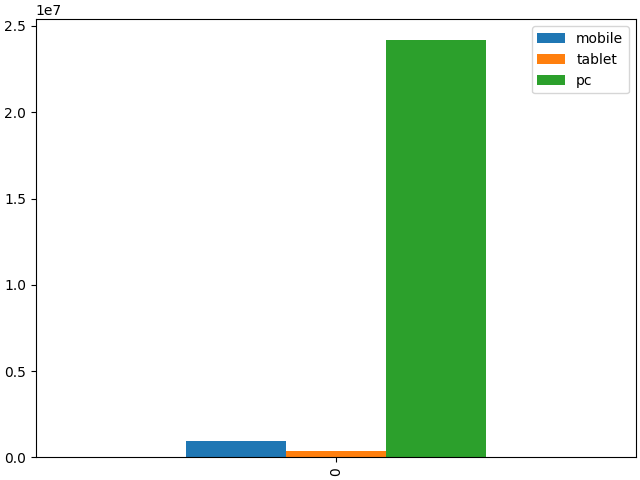

In [87]:
per_device_activity.plot.bar()
%matplot plt

## Get some insight into the timeseries

In [26]:
# how many users do we have in the data
spark.sql('''
select count(distinct userId)
from dfe
''').show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------------------+
|count(DISTINCT userId)|
+----------------------+
|                 22277|
+----------------------+

In [73]:
# which timespan is covered?
spark.sql('''
select from_unixtime(min(ts) / 1000) as start
    , from_unixtime(max(ts) / 1000) as end
from dfe
''').show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+-------------------+
|start              |end                |
+-------------------+-------------------+
|2018-10-01 00:00:01|2018-12-01 00:00:02|
+-------------------+-------------------+

In [74]:
# sanity check: is the sessionId unique or can multiple users have the same sessionId ?
spark.sql('''
select sessionId, count(distinct userId)
from dfe
group by sessionId
order by sessionId
''').show(10)

spark.sql('''
select distinct sessionId,  userId
from dfe
where sessionId=1
''').show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+----------------------+
|sessionId|count(DISTINCT userId)|
+---------+----------------------+
|        1|                     3|
|        2|                     1|
|        3|                     2|
|        4|                     1|
|        5|                     2|
|        6|                     2|
|        7|                     1|
|        9|                     3|
|       10|                     3|
|       11|                     3|
+---------+----------------------+
only showing top 10 rows

+---------+-------+
|sessionId| userId|
+---------+-------+
|        1|1265018|
|        1|1551454|
|        1|1071257|
+---------+-------+

In [75]:
# is itemInSession ascending as the timestamp?
spark.sql('''
WITH timedeltas AS (
    select ts - LAG(ts, 1) over user_sessions as deltatime
    from dfe
    window user_sessions as (partition by userId, sessionId order by itemInSession)
)

select * from timedeltas
where deltatime < 0
''').show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+
|deltatime|
+---------+
+---------+

In [76]:
# do users downgrade multiple times?
spark.sql('''
select userId, count(*)
from dfe
where 1=1 
and page IN ('Submit Downgrade')
group by userId
order by count(*) desc
''').limit(10).show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+--------+
| userId|count(1)|
+-------+--------+
|1662781|       7|
|1782082|       6|
|1287039|       6|
|1343763|       6|
|1747195|       6|
|1481390|       5|
|1876006|       5|
|1663631|       5|
|1305128|       5|
|1249037|       5|
+-------+--------+

In [64]:
# how much activity is in the log ?
daily_activity = spark.sql('''
select date_trunc('day', from_unixtime(ts / 1000)) as day, count(*) activity_count
from dfe
group by day
order by day
''').toPandas().set_index('day')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

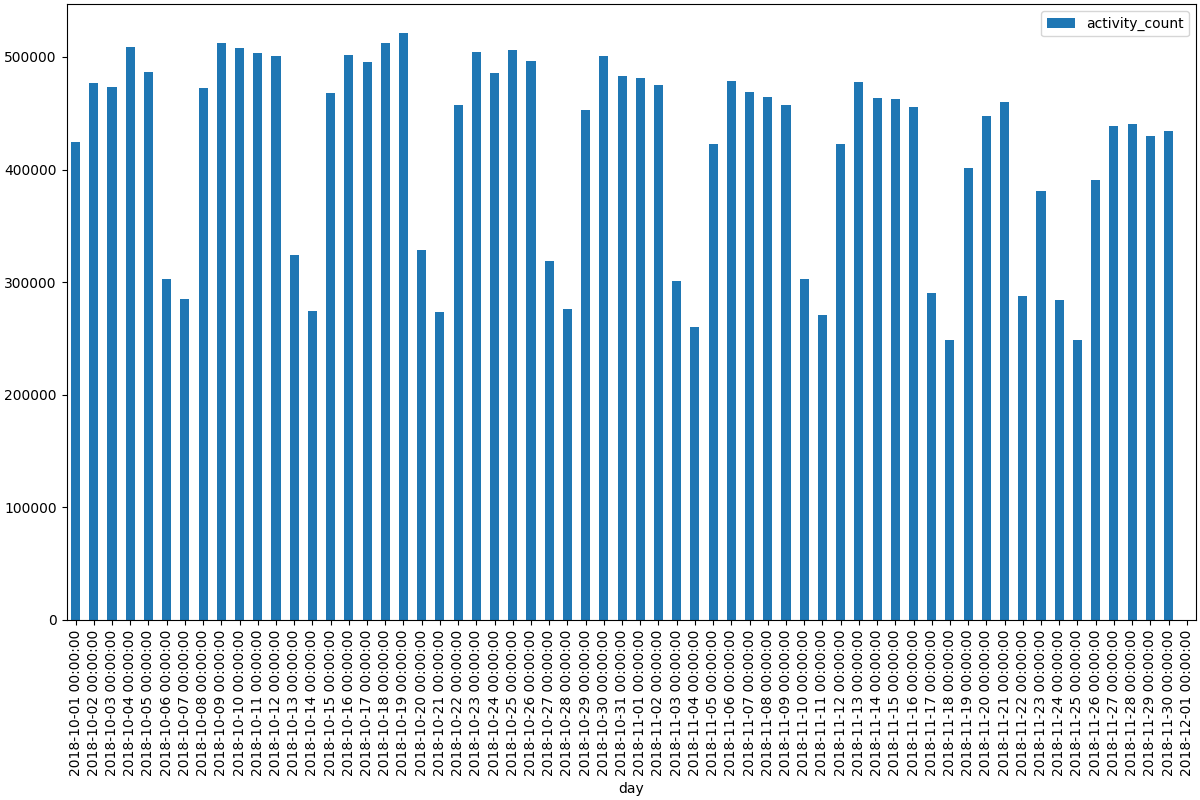

In [79]:
plt.rcParams['figure.constrained_layout.use'] = True
daily_activity.plot.bar(figsize=(12,8))

%matplot plt

In [71]:
# when do churns happen ?
churn_activity = spark.sql('''
select date_trunc('day', from_unixtime(ts / 1000)) as day, count(*) churn_activity
from dfe
where page = 'Cancel'
group by day
order by day
''').toPandas().set_index('day')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

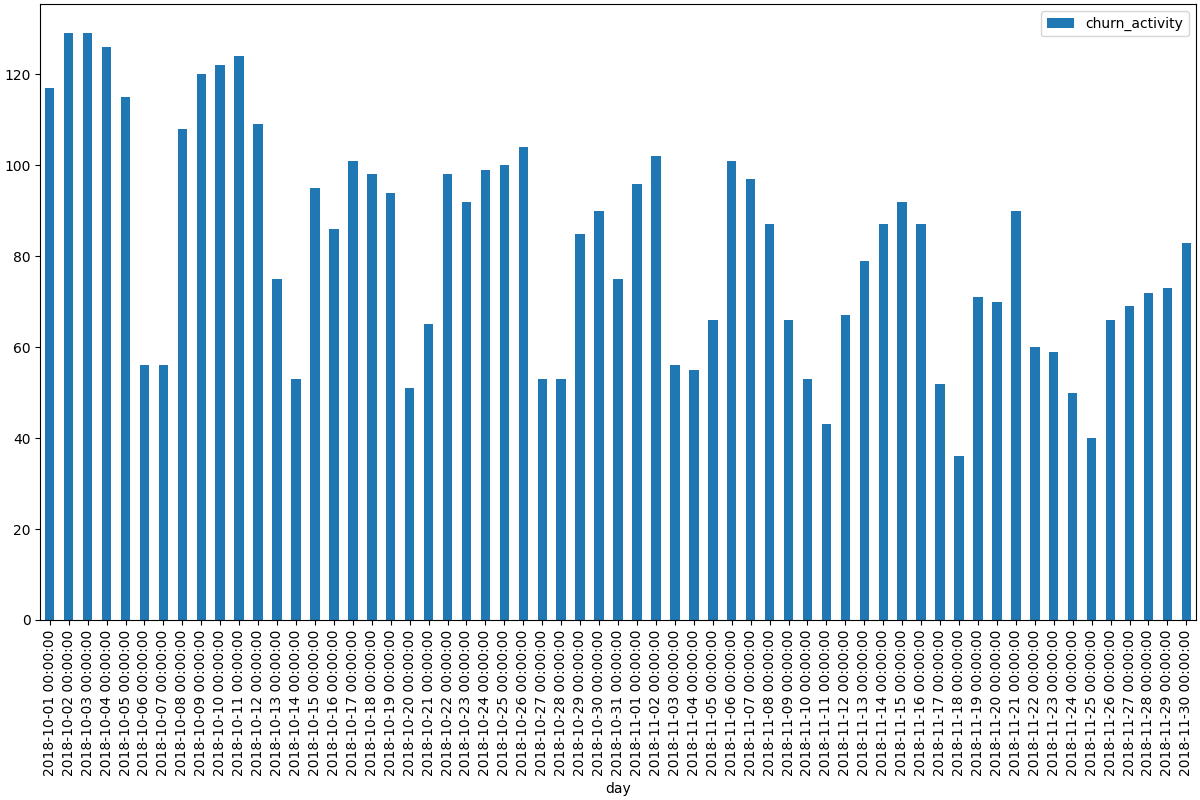

In [81]:

churn_activity.plot.bar(figsize=(12,8))

%matplot plt

In [92]:
hourly_activity = spark.sql('''
select hour(from_unixtime(ts / 1000)) as hour, count(*) hourly_activity
from dfe
group by hour
order by hour
''').toPandas().set_index('hour')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

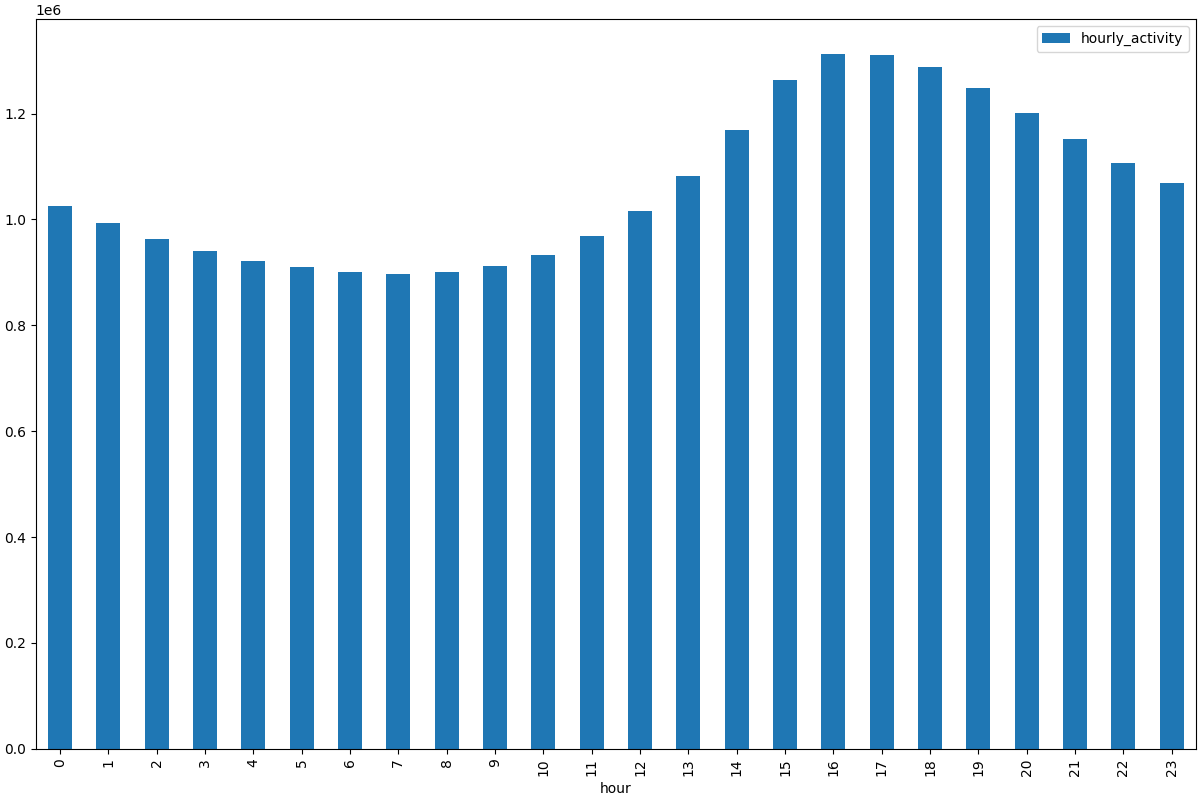

In [93]:
hourly_activity.plot.bar(figsize=(12,8))

%matplot plt

In [117]:
# time span for registration
spark.sql('''
select from_unixtime(min(registration) / 1000) min_reg, from_unixtime(max(registration) / 1000) max_reg
from dfh
''').show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+-------------------+
|            min_reg|            max_reg|
+-------------------+-------------------+
|2017-10-14 22:05:25|2018-12-03 07:23:42|
+-------------------+-------------------+

In [122]:
spark.sql('''
select count(distinct userId)
from dfh
where registration > ts
''').show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------------------+
|count(DISTINCT userId)|
+----------------------+
|                   144|
+----------------------+

## Churn analysis

In [96]:
# mark churn users in column churn
dfh = spark.sql('''
with cancel_flagged_df as (
    select dfe.*
        , case page when 'Cancellation Confirmation' then 1 else 0 end as cancel_event 
        from dfe
        where userId is not null and sessionId is not null
)

select *, sum(cancel_event) over (partition by userId rows between unbounded preceding and unbounded following) as churn
    from cancel_flagged_df
''')
dfh.persist()
dfh.createOrReplaceTempView('dfh')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [98]:
# sanity check number of churn users
spark.sql('''
select churn, count(distinct userId) 
from dfh
group by churn
''').show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----+----------------------+
|churn|count(DISTINCT userId)|
+-----+----------------------+
|    1|                  5003|
|    0|                 17274|
+-----+----------------------+

In [ ]:
# how old are churn users when they leave ?

In [99]:
# do churn users hit some pages more often than others?
page_use_by_churn = spark.sql('''
with page_activity as (
    select page, churn, count(*) as interaction_count
    from dfh
    group by page, churn
    order by page, churn
)

select page, churn, interaction_count / sum(interaction_count)  over (partition by churn) * 100 as percent
from page_activity
where page != 'NextSong'
order by page, churn
''').toPandas().pivot(index='page', columns='churn', values='percent')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

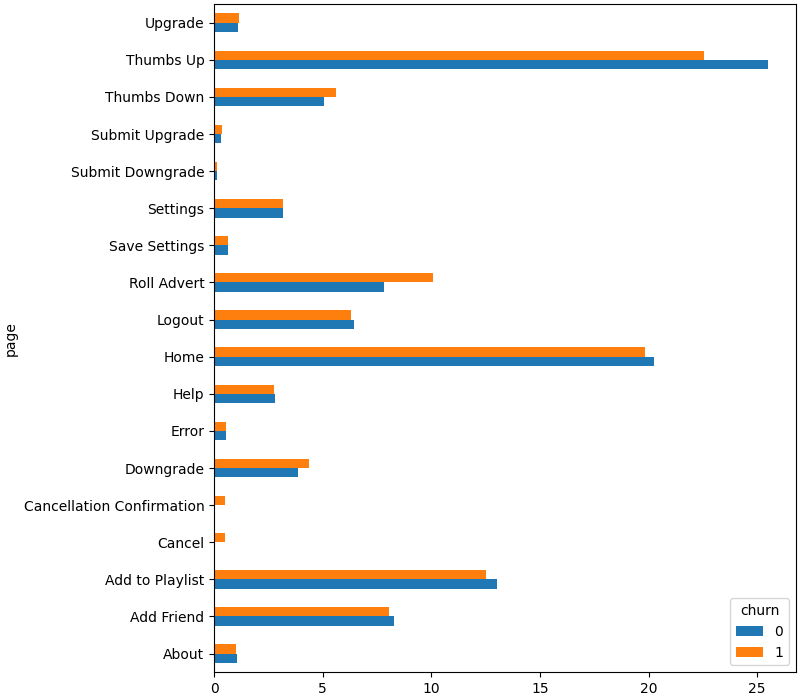

In [101]:
page_use_by_churn.plot.barh(figsize=(8,7))
%matplot plt

In [102]:
# do churn users have an affinity to the free or paid level ?
spark.sql('''with user_levels as (
    select userId, churn, sum(case when level = 'free' then 1 else 0 end) as free
    , sum(case when level = 'paid' then 1 else 0 end) as paid, count(*) c
    from dfh
    group by userId,  churn
)

select churn, sum(case when free > 0 then 1 else 0 end) as free_usage
, sum(case when paid > 0 then 1 else 0 end) as paid_usage
, sum(case when paid > 0 and free > 0 then 1 else 0 end) as both
from user_levels
group by churn
''').show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----+----------+----------+----+
|churn|free_usage|paid_usage|both|
+-----+----------+----------+----+
|    1|      4147|      3891|3035|
|    0|     14645|     12293|9664|
+-----+----------+----------+----+

In [106]:
# do churn users use some devices more often?
spark.sql('''
select churn
    , sum(mobile) / count(*) as mobile
    , sum(tablet) / count(*) as tablet
    , sum(pc)     / count(*) as pc
from dfh
group by churn
''').show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----+--------------------+-------------------+------------------+
|churn|              mobile|             tablet|                pc|
+-----+--------------------+-------------------+------------------+
|    1| 0.04358094531745387|0.01493051420473177|0.9414885404778144|
|    0|0.035050409605252755|0.01418466570203888|0.9507649246927083|
+-----+--------------------+-------------------+------------------+

In [108]:
# page use on paid level ?
page_use_by_churn_paid = spark.sql('''
with page_activity as (
    select page, churn, count(*) as interaction_count
    from dfh
    where level = 'paid'
    group by page, churn
    order by page, churn
)

select page, churn, interaction_count / sum(interaction_count)  over (partition by churn) * 100 as percent
from page_activity
where page != 'NextSong'
order by page, churn
''').toPandas().pivot(index='page', columns='churn', values='percent')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

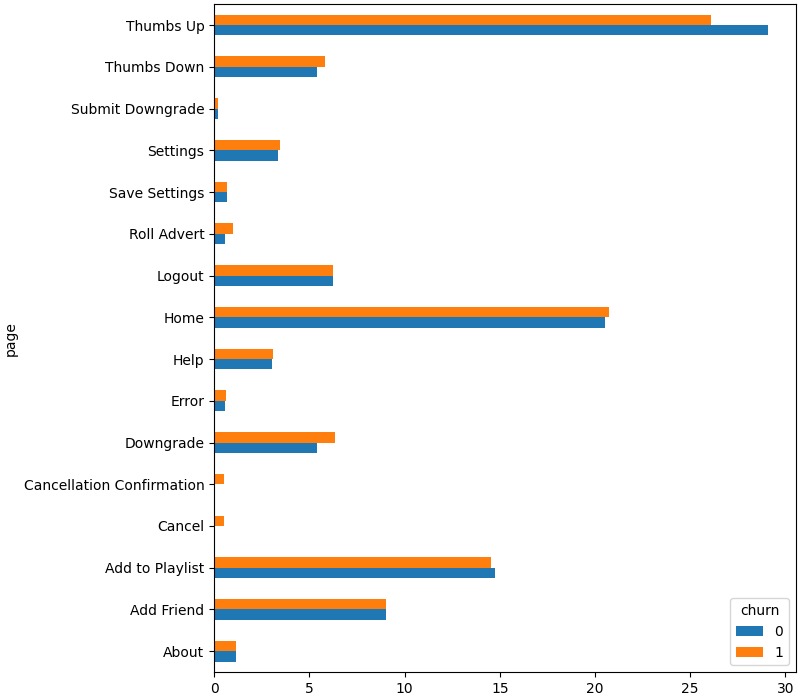

In [111]:
page_use_by_churn_paid.plot.barh(figsize=(8,7))
%matplot plt

In [110]:
# page use on free level
page_use_by_churn_free = spark.sql('''
with page_activity as (
    select page, churn, count(*) as interaction_count
    from dfh
    where level = 'free'
    group by page, churn
    order by page, churn
)

select page, churn, interaction_count / sum(interaction_count)  over (partition by churn) * 100 as percent
from page_activity
where page != 'NextSong'
order by page, churn
''').toPandas().pivot(index='page', columns='churn', values='percent')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

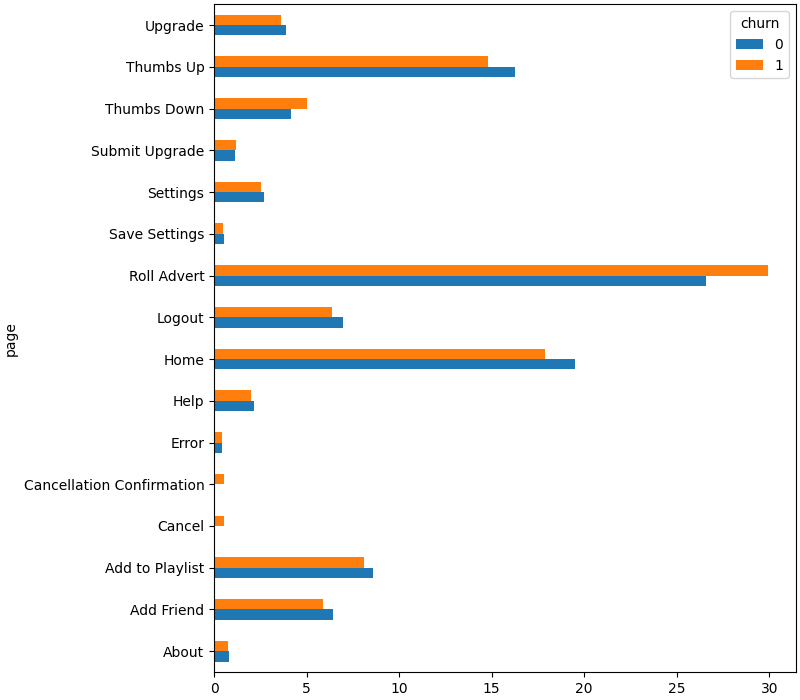

In [112]:
page_use_by_churn_free.plot.barh(figsize=(8,7))
%matplot plt

In [139]:
# time distance between to adverts played
spark.sql('''
WITH rolled_adverts AS (
    select itemInSession, sessionId, ts, userId, churn 
    from dfh
    where page = 'Roll Advert' 
    order by userId, sessionId, itemInSession
),
adverts_delta AS (
    select 
        userid, churn
        , ts - LAG(ts) over (partition by userid, sessionId order by itemInSession) delta
    from rolled_adverts
)

select min(delta), avg(delta), count(*), userid, churn 
from adverts_delta
group by userid, churn
''').show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------+------------------+--------+-------+-----+
|min(delta)|        avg(delta)|count(1)| userid|churn|
+----------+------------------+--------+-------+-----+
|     63000|         4360750.0|      13|1421885|    0|
|    406000| 2885590.909090909|      37|1815994|    0|
|      4000|         2006875.0|      55|1543335|    1|
|    155000| 2333153.846153846|      24|1906066|    0|
|     41000|         2613300.0|      24|1164484|    1|
|     74000| 6670230.769230769|      45|1365300|    1|
|         0|         2806150.0|      29|1923708|    0|
|    160000|         1428750.0|       5|1542149|    0|
|    226000|         2114440.0|      38|1200956|    0|
|     53000|         3002000.0|      18|1309494|    0|
|    143000| 1653142.857142857|      36|1544711|    0|
|    158000|         2344875.0|      14|1678851|    0|
|    287000|         1126000.0|      16|1867528|    0|
|     21000|1805819.6721311475|      84|1126004|    1|
|    179000|         1844400.0|      14|1150021|    0|
|    43700

In [141]:
# number of adverts played per song
spark.sql('''
select sum(case when page='Roll Advert' then 1 else 0 end) /
    sum(case when page='NextSong' then 1 else 0 end) adverts_per_song,
    churn
from dfh
group by churn
''').show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+
|    adverts_per_song|churn|
+--------------------+-----+
|0.022868146008139936|    1|
| 0.01730479040446803|    0|
+--------------------+-----+

In [164]:
# some page ratios based on churn
spark.sql('''
select sum(case when page='Thumbs Up' then 1 else 0 end) /
    sum(case when page='NextSong' then 1 else 0 end) thumbs_up_per_song,
    sum(case when page='Thumbs Down' then 1 else 0 end) /
    sum(case when page='NextSong' then 1 else 0 end) thumbs_down_per_song,
    sum(case when page='Add to Playlist' then 1 else 0 end) /  count(distinct userId) playlist_per_user,
    sum(case when page='Add Friend' then 1 else 0 end) / count(distinct userId) friends,
    sum(case when page='Upgrade' then 1 else 0 end) / count(distinct userId) upgrade_visits,
    sum(case when page='Downgrade' then 1 else 0 end) / count(distinct userId) downgrade_visits,
    sum(case when page='Submit Downgrade' then 1 else 0 end) / count(distinct userId) submitted_downgrades,
    count(*) / count(distinct userId) general_activity,
    sum(case when page='Error' then 1 else 0 end) / count(distinct userId) errors,
    churn
from dfh
group by churn
''').show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+--------------------+-----------------+------------------+------------------+-----------------+--------------------+------------------+------------------+-----+
| thumbs_up_per_song|thumbs_down_per_song|playlist_per_user|           friends|    upgrade_visits| downgrade_visits|submitted_downgrades|  general_activity|            errors|churn|
+-------------------+--------------------+-----------------+------------------+------------------+-----------------+--------------------+------------------+------------------+-----+
|0.05117598618965154|0.012688668018154808|24.91625024985009| 15.99240455726564| 2.244853088147112|8.679592244653207|  0.3002198680791525|1075.8478912652408|1.0653607835298822|    1|
|0.05630425323232586|0.011148933709653476|27.39753386592567|17.462892207942573|2.2737061479680443|8.151904596503416|  0.2889892323723515|1163.4973370383234| 1.141484311682297|    0|
+-------------------+--------------------+-----------------+------------------+-----------

# Feature Creation

## Page activity ratios

In [162]:
feature_page_activity = spark.sql('''
select userId
    , sum(case when page='Thumbs Up' then 1 else 0 end) /
      sum(case when page='NextSong' then 1 else 0 end) thumbs_up_per_song
    , sum(case when page='Thumbs Down' then 1 else 0 end) /
      sum(case when page='NextSong' then 1 else 0 end) thumbs_down_per_song
    , sum(case when page='Roll Advert' then 1 else 0 end) /
      sum(case when page='NextSong' then 1 else 0 end) adverts_per_song
    , sum(case when page='Roll Advert' and level = 'paid' then 1 else 0 end) /
      sum(case when page='NextSong' then 1 else 0 end) adverts_per_song_paid
    , sum(case when page='Roll Advert' and level = 'free' then 1 else 0 end) /
      sum(case when page='NextSong' then 1 else 0 end) adverts_per_song_free
    , sum(case when page='Add to Playlist' then 1 else 0 end) songs_in_playlist
    , sum(case when page='Add Friend' then 1 else 0 end) friends_added
    , sum(case when page='Upgrade' then 1 else 0 end)  upgrade_visits
    , sum(case when page='Downgrade' then 1 else 0 end)  downgrade_visits
    , sum(case when page='Submit Downgrade' then 1 else 0 end) submitted_downgrades
    , sum(case when page='Home' then 1 else 0 end) / count(*) home_visits_per_activity
    , sum(case when page='Help' then 1 else 0 end) / count(*) help_visits_per_activity
    , sum(case when page='Error' then 1 else 0 end) / count(*) errors_per_activity
from dfh
group by userId
''')
feature_page_activity.createOrReplaceTempView('feature_page_activity')
feature_page_activity.show()


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+--------------------+--------------------+--------------------+---------------------+---------------------+-----------------+-------------+--------------+----------------+--------------------+------------------------+------------------------+--------------------+
| userId|  thumbs_up_per_song|thumbs_down_per_song|    adverts_per_song|adverts_per_song_paid|adverts_per_song_free|songs_in_playlist|friends_added|upgrade_visits|downgrade_visits|submitted_downgrades|home_visits_per_activity|help_visits_per_activity| errors_per_activity|
+-------+--------------------+--------------------+--------------------+---------------------+---------------------+-----------------+-------------+--------------+----------------+--------------------+------------------------+------------------------+--------------------+
|1000280| 0.05185909980430528| 0.03228962818003914| 0.07240704500978473|                  0.0|  0.07240704500978473|               25|           14|             9|               3| 

## Music related parameters

In [173]:
feature_music_activity = spark.sql('''
select userId
    , count(distinct Artist) / sum(case when page='NextSong' then 1 else 0 end) artist_diversity
    , count(distinct Artist, Song) / sum(case when page='NextSong' then 1 else 0 end) song_diversity
    , count(distinct Artist, Song) / count(distinct Artist) songs_per_artist
from dfh
group by userId
''')
feature_music_activity.createOrReplaceTempView('feature_music_activity')
feature_music_activity.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+------------------+------------------+------------------+
| userId|  artist_diversity|    song_diversity|  songs_per_artist|
+-------+------------------+------------------+------------------+
|1076191|               1.0|               1.0|               1.0|
|1180406|0.8514492753623188|0.9402173913043478|1.1042553191489362|
|1271218|0.5304456999372253|0.8227662690939527|1.5510848126232741|
|1338783| 0.694560669456067|0.8906156604901375|1.2822719449225473|
|1349958|0.6858159633960346|0.8896797153024911|1.2972572275759822|
|1380035|0.6772867420349434|0.8905447070914697|1.3148710166919575|
|1396135| 0.768993839835729|0.9291581108829569|1.2082777036048065|
|1567623|0.7629955947136564|0.9330396475770925|1.2228637413394918|
|1657177|0.9719626168224299|               1.0|1.0288461538461537|
|1676292|0.7042682926829268|0.9091463414634147| 1.290909090909091|
|1690101|0.6481947942905122|0.8744752308984047|1.3490932642487046|
|1142513|0.8791666666666667|           0.95625|1.0876777251184

In [205]:
# how often does a use skips to the next song though it wasn't completely played?
feature_skip_aheads = spark.sql('''
    with time_deltas AS (
    select userId
        , length + (ts - LEAD(ts) over (partition by userId, sessionId order by itemInSession)) / 1000 as delta  
    from dfh
    where page = 'NextSong'
)
select userId, sum(case when delta < -5 then 1 else 0 end) / count(*) as skip_ahead_per_song
from time_deltas
group by userId
''')
feature_skip_aheads.createOrReplaceTempView('feature_music_activity')
feature_skip_aheads.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+--------------------+
| userId| skip_ahead_per_song|
+-------+--------------------+
|1000280|0.015655577299412915|
|1002185|0.008998875140607425|
|1017805|               0.028|
|1030587|0.002038043478260...|
|1033297|  0.0211864406779661|
|1057724|0.008318170002599427|
|1059049|                 0.0|
|1069552|0.004395604395604396|
|1071308|                 0.0|
|1076191| 0.02127659574468085|
|1083324|                 0.0|
|1102913|0.002656042496679...|
|1114507|                 0.0|
|1133196|                 0.0|
|1142513|                 0.0|
|1151194|0.002304147465437788|
|1156065|                 0.0|
|1178731|0.046188509200150205|
|1180406|                 0.0|
|1190352|0.002256317689530686|
+-------+--------------------+
only showing top 20 rows

## Devices used